# Pymaceuticals Inc.
---

### Analysis

- There is 1 outlier with the Infubinol mice trials that you can see in the bot plots that cannot be considered.

- Bar graph: Number of timepoints for each drug regimen is relatively equal with Propiva being the least and Capomulin with the most timepoints. Ramicane is a very close second.

- Pie graph: Distribution of male and female mice are pretty equal within roughly 1%

- Line graph: The line graph suggests that over time with more timepoints the tumor volume of mice decreases over time as well as they are treated with Capomulin.

- Box plot: The final tumor volume for each drug regimen clearly shows that capomulin is an effective treatment. This validates the line graph. The mice in the capomulin drug trial visually have a smaller range in terms of upper and lower quartiles than Ramicane which is also seen as effective here.

- Correlation: The correlation between mouse weight and average tumor volume is 0.842. It's a positive correlation which means that as the weight of the mice increase their tumor volume also tends to increase and the linear regression model validates this correlation

- Linear regression: The slope is positive and it suggests that heavier mice tend to have larger tumors when treated with Capomulin. On the flip side, if the slope was negative, it would suggest that heavier mice have smaller tumors instead.

- Scatter plot: Looking at the scatter plot I would say that even though there is a positive slope, the scatter plot suggests that the relationship between mouse weight and average tumor volume are not necessarily strong. The trend is definitely there without a doubt, but, the relationship between the two are not plotted closely around the linear regression slope.

- Conclusion: The line graph alone is enough to suggest that the Capomulin treatment is effective on mice as their tumor volume decreases over time as there are more and more timepoints. The box plot validates this data. But, Ramicane is a very close second for sure there should be continued testing between the two or to see what is in these drugs, Capomulin and Ramicane, that are so effective unlike Infubinol or Ceftamin.

- The correlation and linear regression just look at the relationship between the weight of the mice and the size of the average tumor volumes. Those data points are not necessarily looking at the effectiveness of the drug, but are simply based off the relationship of the mice weight and average tumor volume

- And I have to say to remember that correlation does not imply causation


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress, pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
    # matching the columns with the example given
    
column_reorder = [
    "Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites",
    "Drug Regimen", "Sex", "Age_months", "Weight (g)"
]

mouseStudy_df = pd.merge(mouse_metadata, study_results)
mouseStudy_df = mouseStudy_df.reindex(columns=column_reorder)

# Display the data table for preview
mouseStudy_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [2]:
# Checking the number of mice.
num_mice = mouseStudy_df["Mouse ID"].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_timepoint = mouseStudy_df[mouseStudy_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
909,g989,0,45.000000,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = duplicate_mice_timepoint['Mouse ID'].unique()[0]
print(duplicate_mouse_id)

print(len(duplicate_mouse_id)) # only 4 duplicates?


g989
4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouseStudy_df = clean_mouseStudy_df = mouseStudy_df[mouseStudy_df['Mouse ID'] != duplicate_mouse_id]
clean_mouseStudy_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = clean_mouseStudy_df['Mouse ID'].nunique()
clean_num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_mice_df = clean_mouseStudy_df.groupby('Drug Regimen')

mean = grouped_mice_df['Tumor Volume (mm3)'].mean()
median = grouped_mice_df['Tumor Volume (mm3)'].median()
variance = grouped_mice_df['Tumor Volume (mm3)'].var()
std_dev = grouped_mice_df['Tumor Volume (mm3)'].std()
sem = grouped_mice_df['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume Std. Err.': sem
})

summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_advanced = clean_mouseStudy_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_advanced

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

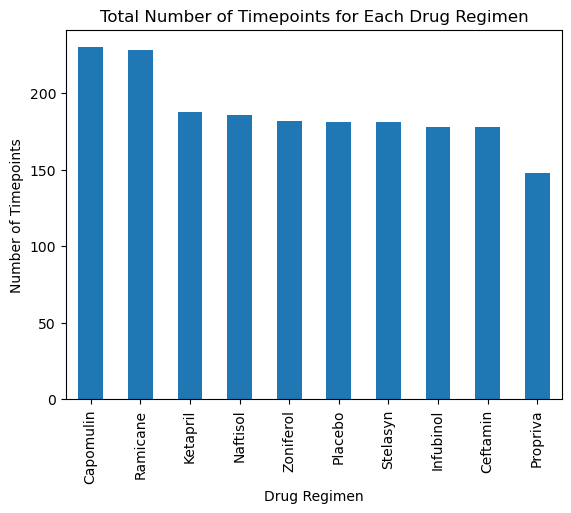

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

clean_mouseStudy_df['Drug Regimen'].value_counts().plot(kind='bar')
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()


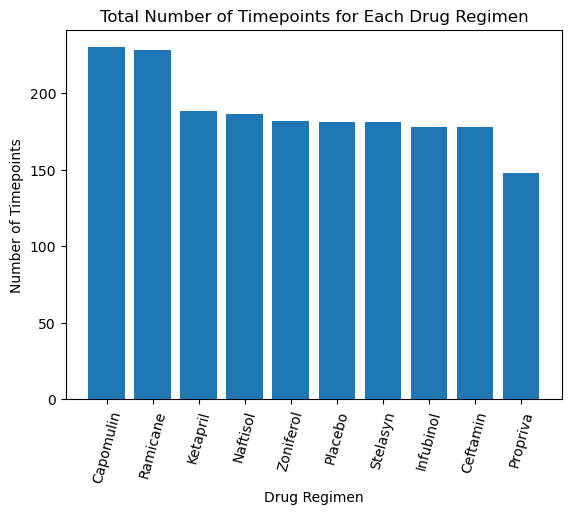

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

mouseStudyPyPlot = clean_mouseStudy_df['Drug Regimen'].value_counts()
plt.bar(mouseStudyPyPlot.index, mouseStudyPyPlot.values)
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=75)
plt.show()


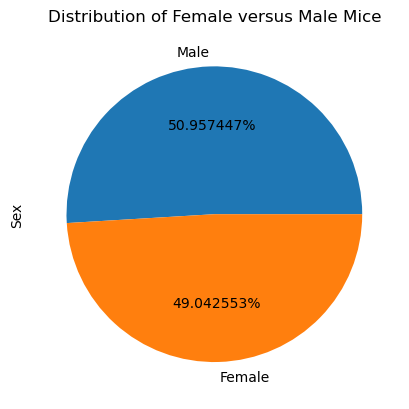

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

clean_mouseStudy_df['Sex'].value_counts().plot(kind='pie', autopct='%1f%%')
plt.title('Distribution of Female versus Male Mice')
plt.show()


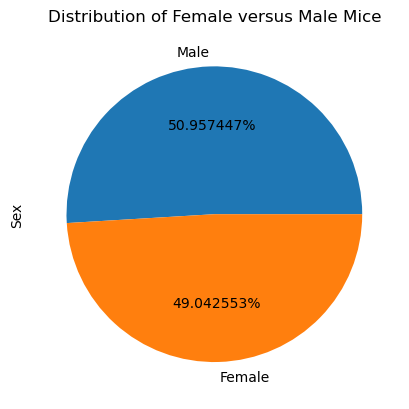

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

malefemale_counts = clean_mouseStudy_df['Sex'].value_counts()
plt.pie(malefemale_counts.values, labels=malefemale_counts.index, autopct='%1f%%')
plt.title('Distribution of Female versus Male Mice')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouseStudy_df.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = last_timepoint.reset_index()
merged_timepoint_mouseStudy_df = pd.merge(last_timepoint_df, clean_mouseStudy_df, on=['Mouse ID', 'Timepoint'])
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_timepoint_mouseStudy_df[merged_timepoint_mouseStudy_df['Drug Regimen'].isin(drug_regimen)]
final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers_lower = final_tumor_vol.loc[final_tumor_vol < lower_bound]
    outliers_upper = final_tumor_vol.loc[final_tumor_vol > upper_bound]
    outliers = pd.concat([outliers_lower, outliers_upper])
    
    print(f'IQR for {treatment}: {iqr}')
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    print(f'Number of {treatment} outliers: {outliers.shape[0]}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


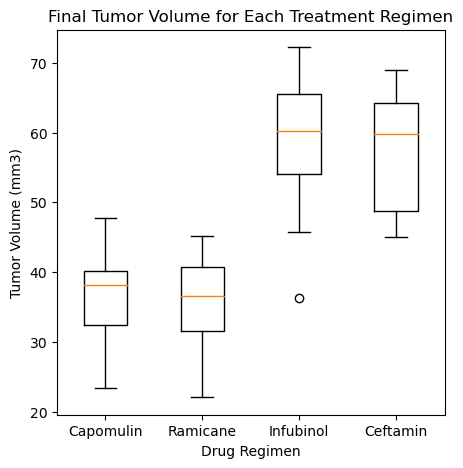

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.figure(figsize=[5,5])

plt.boxplot(tumor_vol_data, labels=treatments)

plt.title('Final Tumor Volume for Each Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

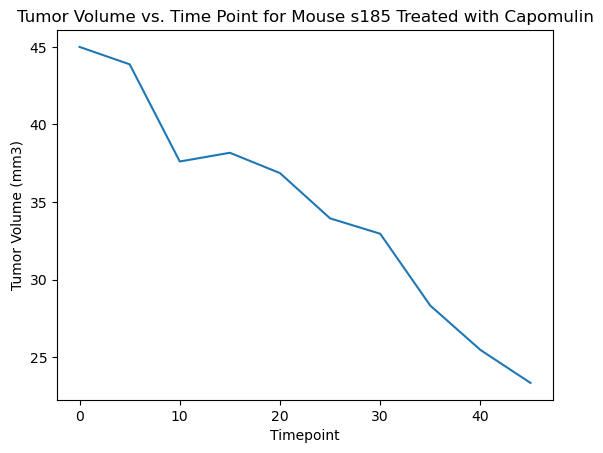

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

single_mouse_data = clean_mouseStudy_df.loc[(clean_mouseStudy_df['Mouse ID'] == 's185') & (clean_mouseStudy_df['Drug Regimen'] == 'Capomulin')]

plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point for Mouse s185 Treated with Capomulin')
plt.show()


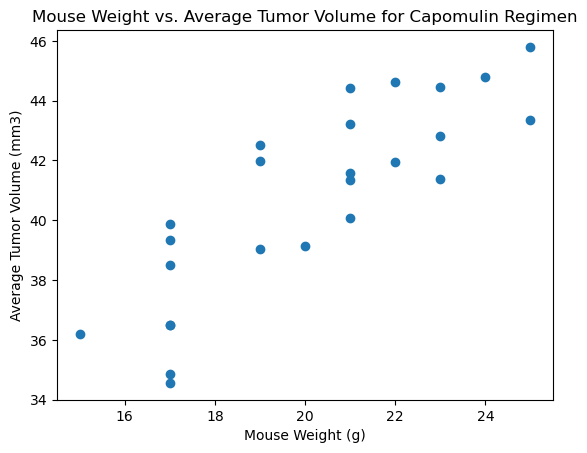

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_mouseStudy_df.loc[clean_mouseStudy_df['Drug Regimen'] == 'Capomulin']

avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()


plt.scatter(mouse_weight, avg_tumor_vol)

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.842


Text(0.5, 1.0, 'Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

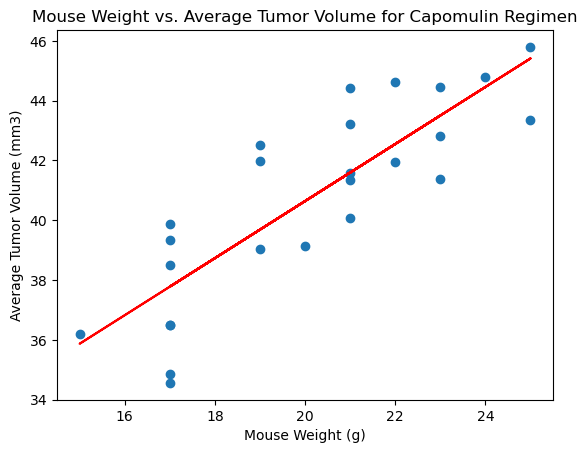

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Correlation coefficient
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)[0]
print(f"The correlation between mouse weight and average tumor volume is {correlation:.3f}")

# Linear regression model

x_values = mouse_weight
y_values = avg_tumor_vol

# math for linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# scatter plot of mouse weight vs average tumor volume
plt.scatter(x_values, y_values)

# linear regression line to the scatter plot
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (5.8,0.8), fontsize=15, color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
